In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Generate some data

In [15]:
X_size = (50, 1)
X = np.random.randint(1, 100, X_size)
y = 3 + 2 * X

In [16]:
y_b = 3 + 2 * X + np.random.randn(X_size[0], X_size[1])

### Visualize the original data

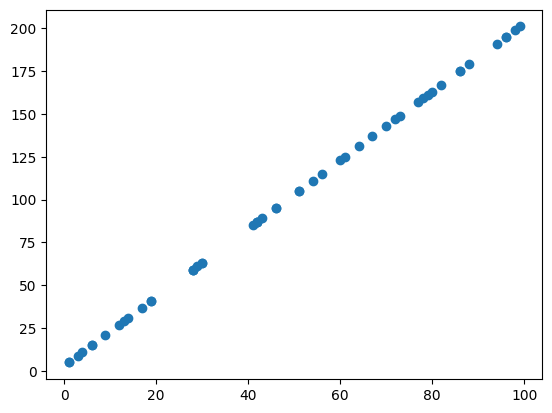

In [4]:
plt.scatter(X, y)

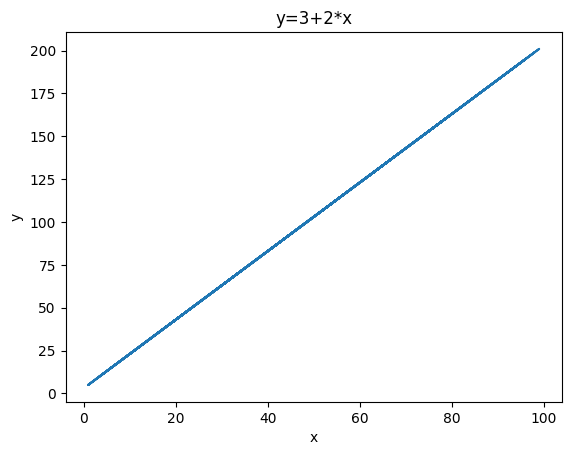

In [5]:
plt.plot(X, y)
plt.title("y=3+2*x")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### Visualize the data with Gaussian noise

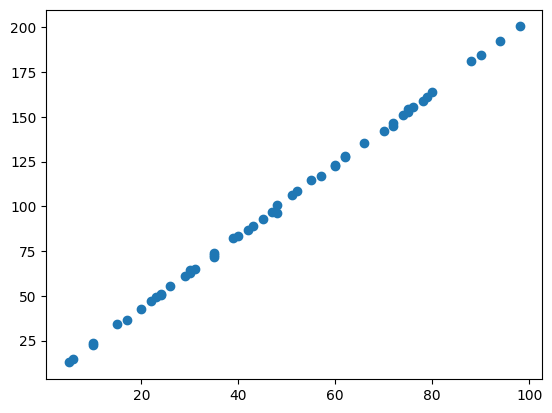

In [4]:
plt.scatter(X, y_b)

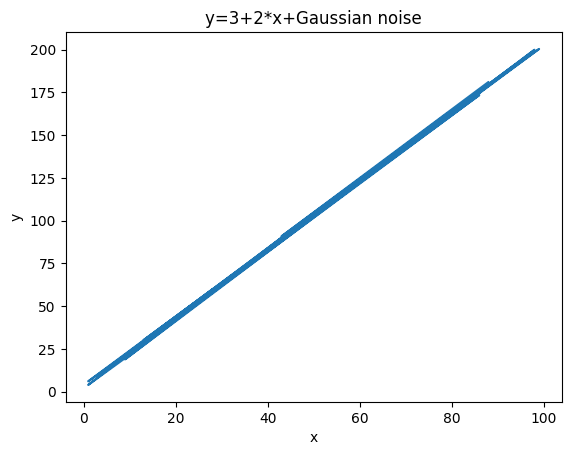

In [11]:
plt.plot(X, y_b)
plt.title("y=3+2*x+Gaussian noise")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## The Normal Equation

### Formula

$$
\begin{align}
    \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y \label{eq:normal_equation} \tag{1}
\end{align}
$$
In this equation:
- $ \hat{\theta} $ is the value of $ \theta $ that minimizes the cost function;
- $ y $ is the vector of target values containing $ y^{(1)} $ to $ y^{(m)} $.

### Data Preparation

In [17]:
X_b = np.c_[np.ones(X_size), X] # add x0 = 1 to each instance

**If we use as y the results of a linear function (without additional noise), then the linear regression equation coincides with the original one**

### Calculate coeficients

In [18]:
theta_coefs = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)
theta_coefs

array([[3.],
       [2.]])

In [7]:
theta_coefs = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y_b)
theta_coefs

array([[2.76980635],
       [2.00980156]])

**If the data contains noise, then the linear regression coefficients will be close to the original ones, but the noise made it impossible to recover the exact parameters of the original function**

### Make predictions

In [9]:
X_test = np.array([[1], [50], [100]])
X_test_b = np.c_[np.ones((3, 1)), X_test]
X_test_b

array([[  1.,   1.],
       [  1.,  50.],
       [  1., 100.]])

In [10]:
y_predict = np.dot(X_test_b, theta_coefs)
y_predict

array([[  4.77960791],
       [103.25988449],
       [203.74996264]])

### Plot models predictions

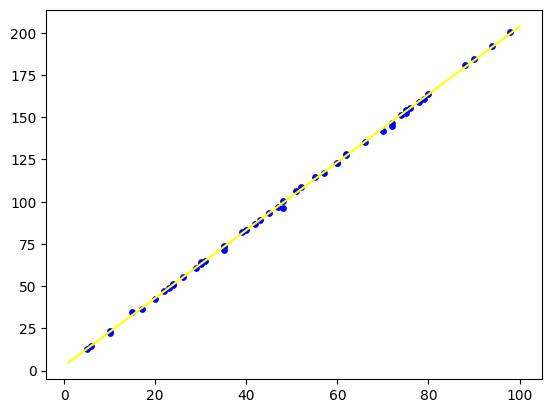

In [11]:
plt.scatter(X, y_b, color='blue', s=15)
plt.plot(X_test, y_predict, color='yellow')

## Moore-Penrose Pseudoinverse

### Formula

$$
\begin{align}
    \hat{\theta} = X^+ \cdot y \label{eq:Moore-Penrose_pseudoinverse_LR_equation} \tag{2}
\end{align}
$$
In this equation:
- $ \hat{\theta} $ is the value of $ \theta $ that minimizes the cost function;
- $ X^+ $ is the pseudoinverse of X (specifically the Moore-Penrose inverse) \eqref{eq:matrix_pseudoinverse_equation};
- $ y $ is the vector of target values containing $ y^{(1)} $ to $ y^{(m)} $.

$$
\begin{align}
    A^+ = V \cdot D^+ \cdot U^T \label{eq:matrix_pseudoinverse_equation} \tag{3}
\end{align}
$$
In this equation
- $ A^+ $ is the pseudoinverse of matrix A; $ A^+ $ *is mega useful because non-square matrices are common in ML*;
- U, D and V are the SVD of A;
- $ D^+ $ is $D^T$ matrix with reciprocal of all non-zero elements.

### Data Preparation

For regression problems, we typically have many more cases (n, or rows of $X$) than features to predict (m, or columns of $X$).
Let's solve a miniature example of such an overdetermined situation.

We have eight data points (n=8)

In [19]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

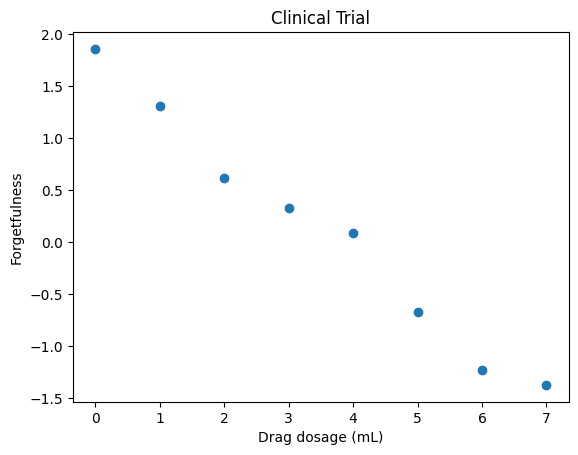

In [13]:
title = 'Clinical Trial'
xlabel = 'Drag dosage (mL)'
ylabel = 'Forgetfulness'

fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Altough it appears there is only one predictor ($x_1$), we need a second one ($x_0$) in order to follow for a y-intercept (therefore, m = 2).
Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The y-intercept is constant across all the points so we can set it equal to $1$ across the board.

In [21]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

#### Concarenate $x_0$ and $x_1$ into a matrix $X$:

In [25]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

### Calculate coefficients

From the formula \eqref{eq:Moore-Penrose_pseudoinverse_LR_equation} we know, that we can calculate the coefficints using this equation

In [27]:
theta_coefs = np.dot(np.linalg.pinv(X), y)
theta_coefs

matrix([[ 1.76      , -0.46928571]])

### Plot linear regression line

The first weight corresponds to the y-intercept of the line, which is typically denoted as $b$

In [34]:
b = np.asarray(theta_coefs).reshape(-1)[0] # reshape(-1) is used to flatten the array. 
                                           # This means that regardless of the original shape of theta_coefs, 
                                           # the resulting array will be one-dimensional (a flat array).
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as $m$

In [38]:
m = np.asarray(theta_coefs).reshape(-1)[1]
m

-0.4692857142857139

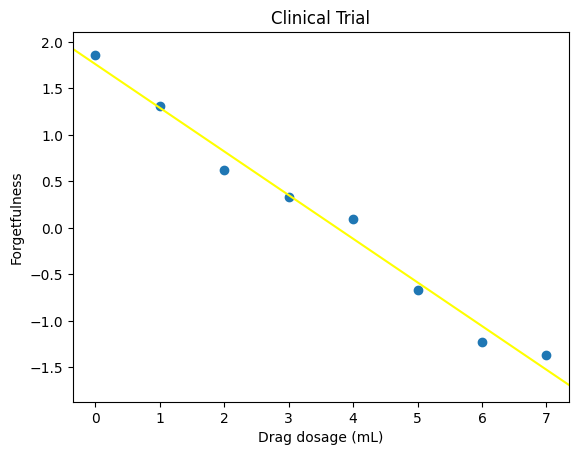

In [40]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_min, y_max = m*x_min + b, m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_min, y_max], color='yellow')

### Evaluating Performane

In [48]:
predictions = m*np.array(x1) + b
predictions

array([ 1.76      ,  1.29071429,  0.82142857,  0.35214286, -0.11714286,
       -0.58642857, -1.05571429, -1.525     ])

In [52]:
# MAE
print(f"MAE = {np.mean(np.abs(np.array(y) - predictions))}")
# MSE
print(f"MSE = {np.mean(np.square(np.array(y) - predictions))}")
# RMSE
print(f"RMSE = {np.sqrt(np.mean(np.square(np.array(y) - predictions)))}")

MAE = 0.120357142857143
MSE = 0.01946607142857142
RMSE = 0.13952086377517672
